<a href="https://colab.research.google.com/github/gbazack/IR-UWB/blob/main/DataExtraction_rarfile.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
!pip install rarfile

In [59]:
#Import libraries
import os
import rarfile
import numpy as np
from matplotlib import pyplot as plt

In [2]:
#Create a directory named iruwb_data/
dir_path=os.path.join(os.getcwd(),'iruwb_data/')
os.mkdir(dir_path)

In [51]:
#Download the file, rename and save it to content/iruwb_data/
#For instance: We want to download the file Data part1_1.rar
#We rename it datapart1_1.rar and save it to content/iruwb_data

f_path=os.path.join(dir_path,'dataset1_1.rar')

!wget -O /content/iruwb_data/dataset1_1.rar  https://github.com/yangxiuzhu777/IR-UWB-Radar-Signal-Dataset-for-Dense-People-Counting/blob/master/Dataset%20part%201_1.rar?raw=true

--2021-02-28 05:33:52--  https://github.com/yangxiuzhu777/IR-UWB-Radar-Signal-Dataset-for-Dense-People-Counting/blob/master/Dataset%20part%201_1.rar?raw=true
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/yangxiuzhu777/IR-UWB-Radar-Signal-Dataset-for-Dense-People-Counting/raw/master/Dataset%20part%201_1.rar [following]
--2021-02-28 05:33:52--  https://github.com/yangxiuzhu777/IR-UWB-Radar-Signal-Dataset-for-Dense-People-Counting/raw/master/Dataset%20part%201_1.rar
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/yangxiuzhu777/IR-UWB-Radar-Signal-Dataset-for-Dense-People-Counting/master/Dataset%20part%201_1.rar [following]
--2021-02-28 05:33:52--  https://raw.githubusercontent.com/yangxiuzhu777/IR-UWB-Radar-Signal-Dataset-for-Dense-People-Counting

In [53]:
#Decompress and extract the files to content/iruwb_data/
rfile=rarfile.RarFile(f_path)
rfile.extractall(dir_path)

In [58]:
#Rename the destination directory
os.chdir(dir_path)
#os.getcwd()
os.rename('Dataset part 1_1', 'dataset1_1')

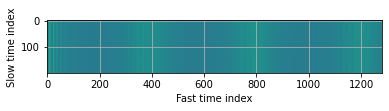

In [71]:
#List all the files of "dataset1_1/0/" directory
listfiles=os.listdir('dataset1_1/0/.')
listfiles.remove('.ipynb_checkpoints')
#os.mkdir('dataset1_1/images/0')
file_index=0

#Extract and preprocess the data from each file
for filename in listfiles:
    filename=os.path.join('dataset1_1/0',filename) #create the path to a file
    read_file=open(filename, 'r')                  #open the file
    load_file=read_file.readlines()                #load data from the file as string (str)
    
    #Create an array of size x_sise*y_size to 
    #This array is named "data"
    x_size=len(load_file)
    y_size=int((len(load_file[0])+1)/10)
    data=np.zeros((x_size,y_size))
    
    #Clean the data and convert them to float
    for index in range(len(load_file)):
        
        #Remove special characters
        load_file[index].replace('\t', ' ')
        load_file[index].replace('\n', '')
        f=[]
        
        #For each row of the data, convert 1280 string of size 10 to float
        for i in range(0, len(load_file[index]), 10):
            f.append(load_file[index][i:i+10])
        data[index]=f
    
    #Display and save each file as an image
    imagename=os.path.join('dataset1_1/images/0',listfiles[file_index]+'.png')
    file_index=file_index+1
    plt.imshow(data)
    plt.ylabel('Slow time index')
    plt.xlabel('Fast time index')
    plt.grid(True)
    plt.savefig(imagename)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')